<a href="https://colab.research.google.com/github/jagan969646/Jagadeesh-N/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving historical_data (1).csv to historical_data (1).csv


In [8]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [13]:
import pandas as pd

# Load the files
trader_df = pd.read_csv("historical_data (1).csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [14]:
# checking the data
print(trader_df.shape)
print(sentiment_df.shape)

print(trader_df.columns)
print(sentiment_df.columns)

(211224, 16)
(2644, 4)
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [15]:
# Standardize and clean date columns
# Convert timestamps to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Create a common 'Date' column for merging
trader_df['Date'] = trader_df['Timestamp'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date

In [19]:
# How many rows have missing sentiment classification?
missing_sentiment = merged_df['classification'].isna().sum()
print(f"Rows missing classification: {missing_sentiment} / {len(merged_df)}")

Rows missing classification: 211224 / 211224


In [20]:
# Reconvert both to datetime.date
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce').dt.normalize().dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Re-merge
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on='Date', how='left')

# Check again
print("Rows with classification:", merged_df['classification'].notna().sum())

Rows with classification: 0


In [21]:
print("Trader Data Range:", trader_df['Date'].min(), "to", trader_df['Date'].max())
print("Sentiment Data Range:", sentiment_df['Date'].min(), "to", sentiment_df['Date'].max())

Trader Data Range: 1970-01-01 to 1970-01-01
Sentiment Data Range: 2018-02-01 to 2025-05-02


In [22]:
print(trader_df[['Timestamp', 'Timestamp IST']].dropna().head(10))

            Timestamp     Timestamp IST
0 1970-01-01 00:28:50  02-12-2024 22:50
1 1970-01-01 00:28:50  02-12-2024 22:50
2 1970-01-01 00:28:50  02-12-2024 22:50
3 1970-01-01 00:28:50  02-12-2024 22:50
4 1970-01-01 00:28:50  02-12-2024 22:50
5 1970-01-01 00:28:50  02-12-2024 22:50
6 1970-01-01 00:28:50  02-12-2024 22:50
7 1970-01-01 00:28:50  02-12-2024 22:50
8 1970-01-01 00:28:50  02-12-2024 22:50
9 1970-01-01 00:28:50  02-12-2024 22:50


In [23]:
# Parse Timestamp IST correctly
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

In [24]:
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on=
'Date', how='left')
print("Rows with classification:", merged_df['classification'].notna().sum())

Rows with classification: 211218


In [25]:
merged_df[['Account', 'Coin', 'Execution Price', 'Side', 'Closed PnL', 'Fee', 'Trade ID', 'classification']].head()

,Account,Coin,Execution Price,Side,Closed PnL,Fee,Trade ID,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,BUY,0.0,0.345404,8.950000e+14,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,BUY,0.0,0.005600,4.430000e+14,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,BUY,0.0,0.050431,6.600000e+14,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,BUY,0.0,0.050043,1.080000e+15,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,BUY,0.0,0.003055,1.050000e+15,Extreme Greed


from matplotlib import pyplot as plt
_df_12['Execution Price'].plot(kind='hist', bins=20, title='Execution Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Fee'].plot(kind='hist', bins=20, title='Fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Trade ID'].plot(kind='hist', bins=20, title='Trade ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Execution Price', y='Fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Fee', y='Trade ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Fee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Trade ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Trade ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Execution Price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Execution Price'}, axis=1)
              .sort_values('Execution Price', ascending=True))
  xs = counted['Execution Price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Closed PnL']
  ys = series['Fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Closed PnL', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('Fee')

from matplotlib import pyplot as plt
_df_21['Execution Price'].plot(kind='line', figsize=(8, 4), title='Execution Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Fee'].plot(kind='line', figsize=(8, 4), title='Fee')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Trade ID'].plot(kind='line', figsize=(8, 4), title='Trade ID')
plt.gca().spines[['top', 'right']].set_visible(False)

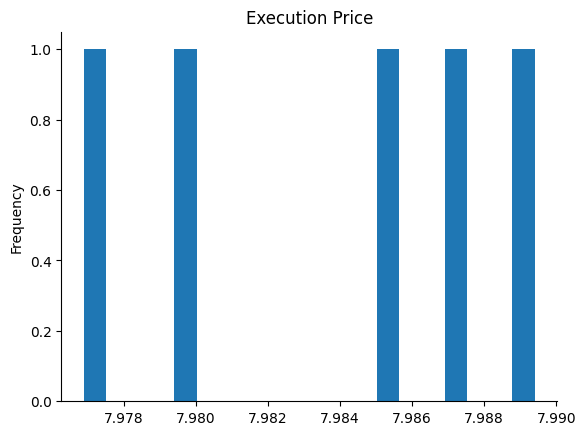

In [40]:
from matplotlib import pyplot as plt
_df_12['Execution Price'].plot(kind='hist', bins=20, title='Execution Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

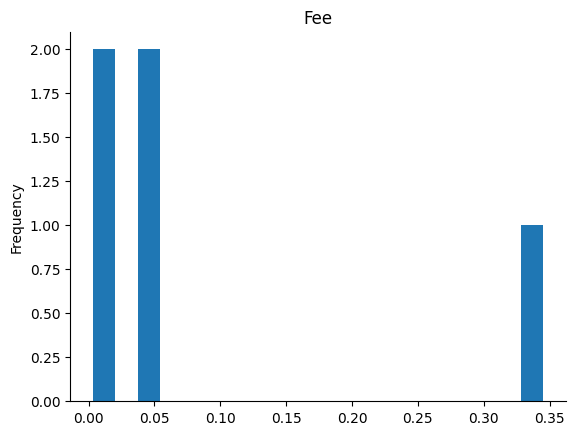

In [41]:
from matplotlib import pyplot as plt
_df_13['Fee'].plot(kind='hist', bins=20, title='Fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

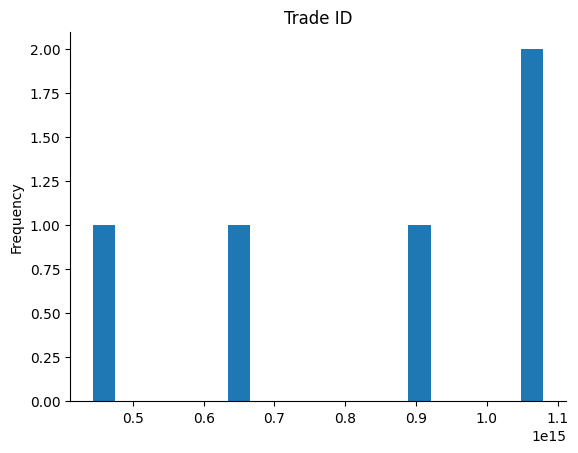

In [42]:
from matplotlib import pyplot as plt
_df_14['Trade ID'].plot(kind='hist', bins=20, title='Trade ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

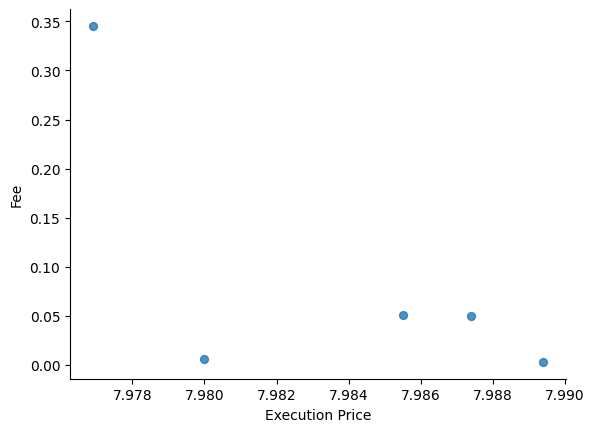

In [43]:
from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Execution Price', y='Fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

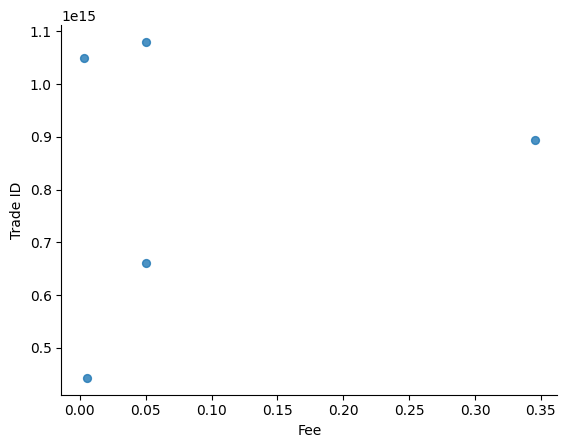

In [44]:
from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Fee', y='Trade ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

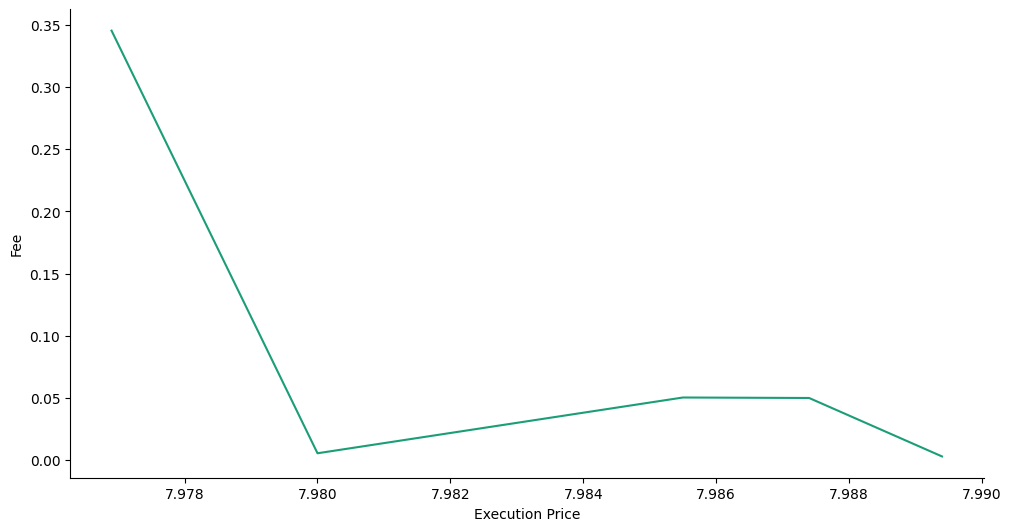

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Fee']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Fee')

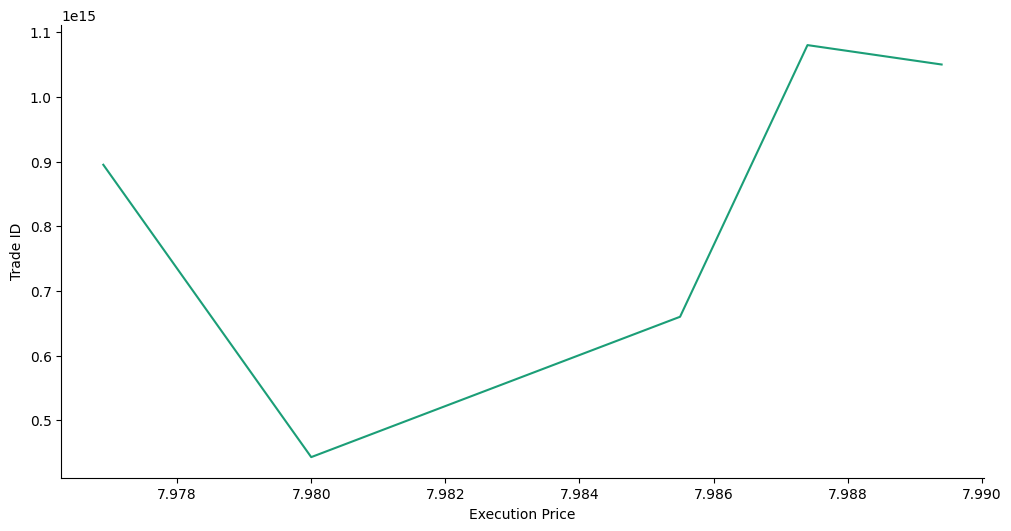

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Trade ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Trade ID')

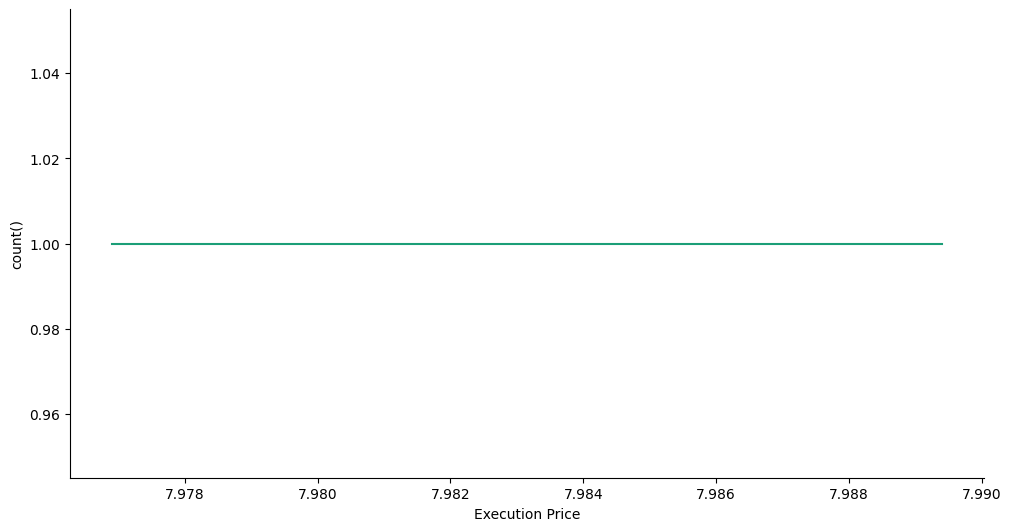

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Execution Price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Execution Price'}, axis=1)
              .sort_values('Execution Price', ascending=True))
  xs = counted['Execution Price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('count()')

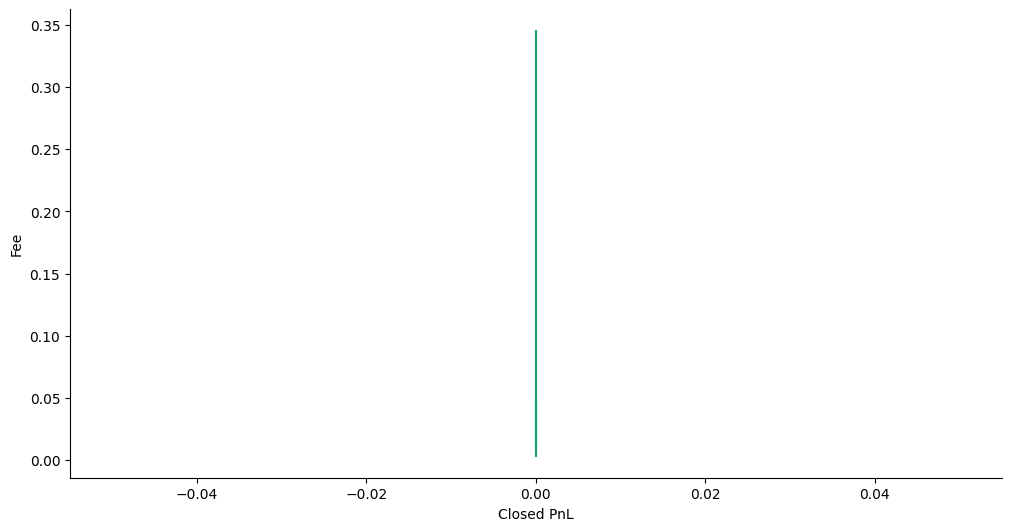

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Closed PnL']
  ys = series['Fee']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Closed PnL', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('Fee')

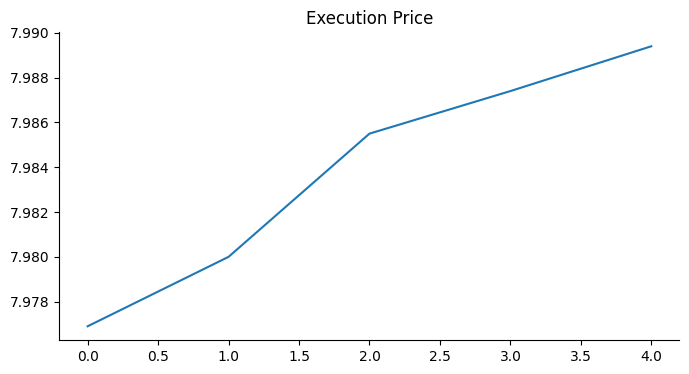

In [49]:
from matplotlib import pyplot as plt
_df_21['Execution Price'].plot(kind='line', figsize=(8, 4), title='Execution Price')
plt.gca().spines[['top', 'right']].set_visible(False)

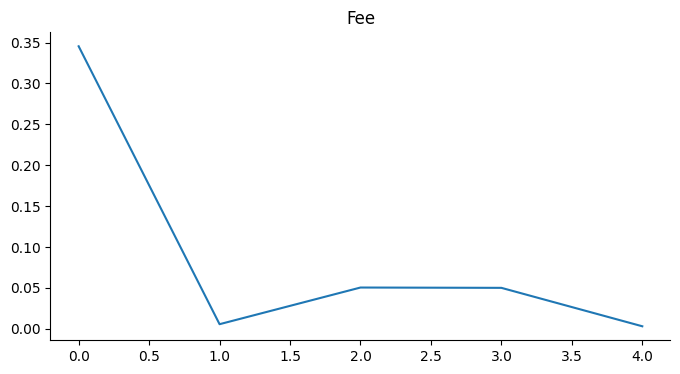

In [50]:
from matplotlib import pyplot as plt
_df_22['Fee'].plot(kind='line', figsize=(8, 4), title='Fee')
plt.gca().spines[['top', 'right']].set_visible(False)

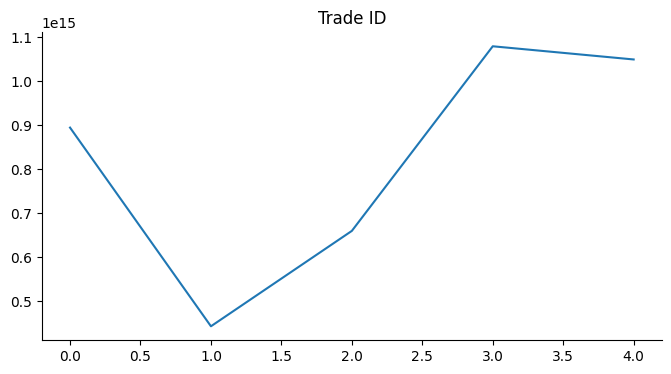

In [51]:
from matplotlib import pyplot as plt
_df_23['Trade ID'].plot(kind='line', figsize=(8, 4), title='Trade ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
import os
os.makedirs("outputs", exist_ok=True)

/tmp/ipython-input-704336797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')


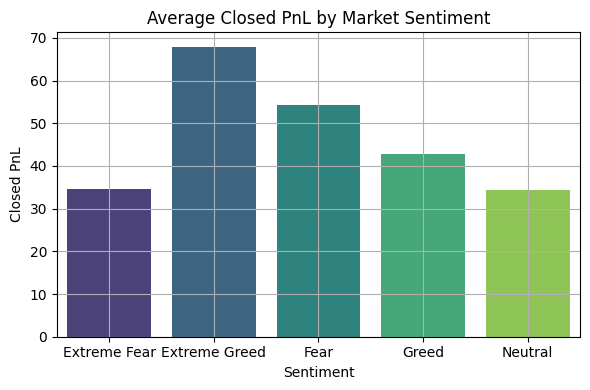

In [31]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# Filter valid rows
filtered_df = merged_df.dropna(subset=['Closed PnL', 'classification'])

# Group and plot
avg_pnl = filtered_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.savefig('outputs/avg_pnl_by_sentiment.png')
plt.show()

/tmp/ipython-input-1362086984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='classification', y='Fee', palette='coolwarm')


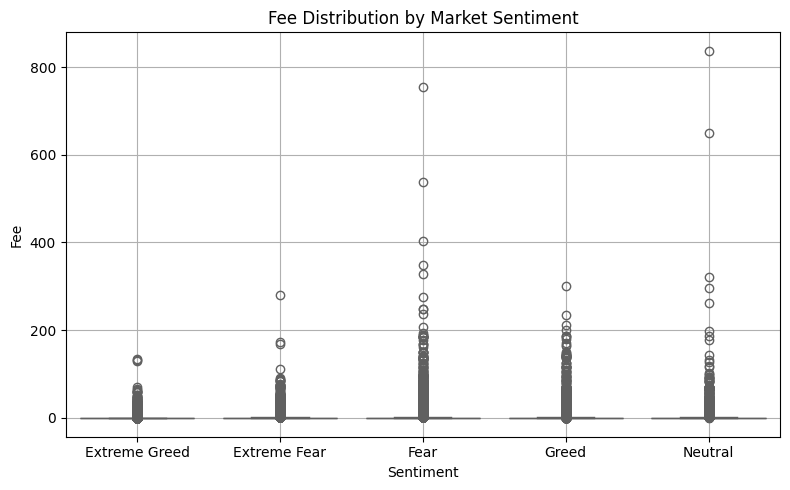

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x='classification', y='Fee', palette='coolwarm')
plt.title('Fee Distribution by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Fee')
plt.grid(True)
plt.tight_layout()
plt.savefig('outputs/fee_distribution.png')
plt.show()

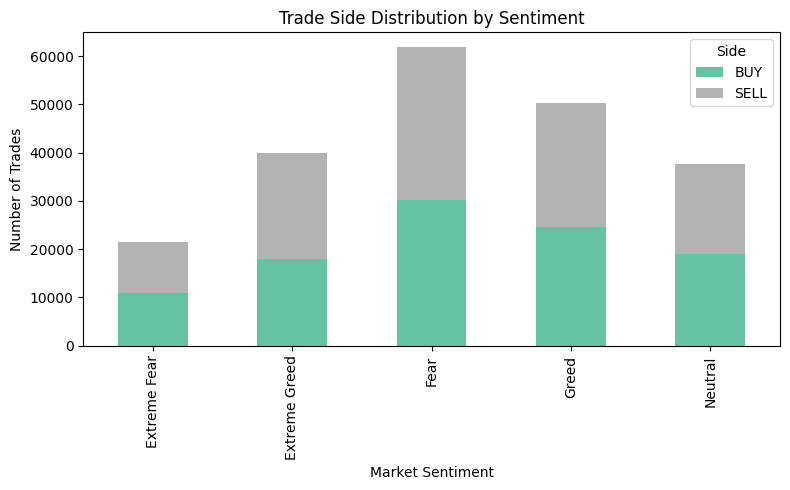

In [30]:
side_counts = filtered_df.groupby(['classification', 'Side']).size().unstack().fillna(0)

side_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Trade Side Distribution by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Side')
plt.tight_layout()
plt.savefig('outputs/trade_side_distribution.png')
plt.show()

In [38]:
import shutil

# Compress the file
shutil.make_archive('final_csv_zip', 'zip', 'outputs', 'final_trader_sentiment_data.csv')

'/content/final_csv_zip.zip'

In [39]:
from google.colab import files
files.download('final_csv_zip.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>